C:\Users\M S I\AppData\Local\Temp\ipykernel_6356\3841893982.py:13: RuntimeWarning: invalid value encountered in scalar power
  skewness = np.mean((grayscale - mean) ** 3) ** (1/3)


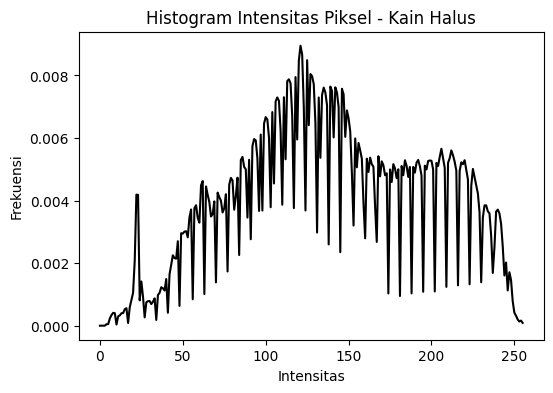

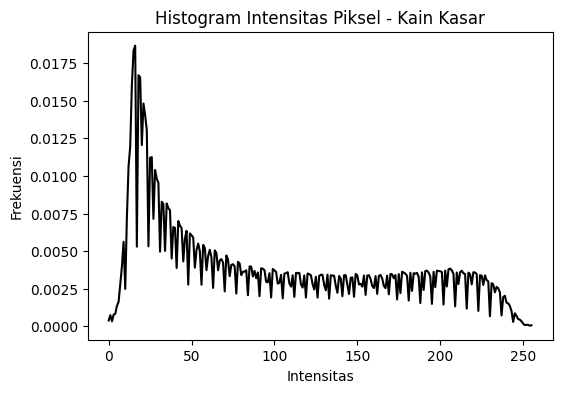

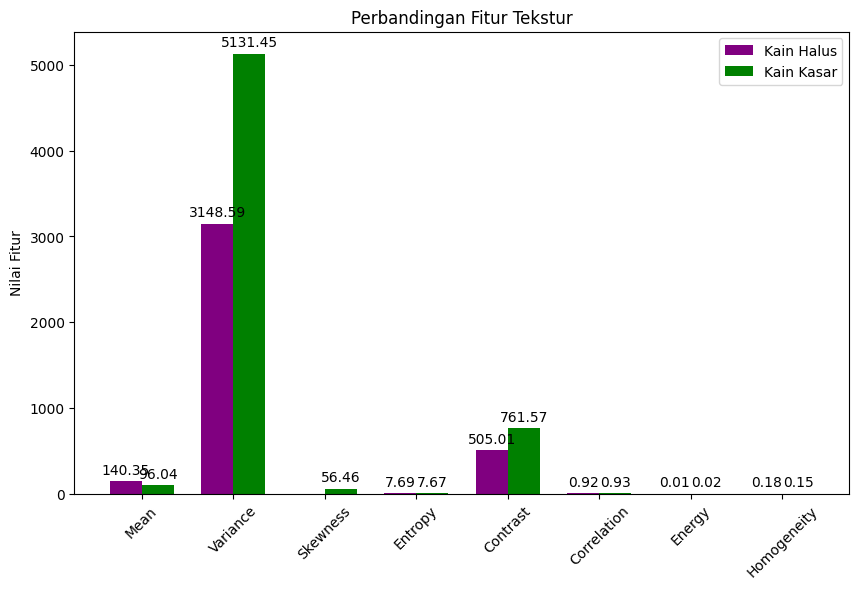

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops  

def extract_first_order_features(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    
    mean = np.mean(grayscale)
    variance = np.var(grayscale)
    skewness = np.mean((grayscale - mean) ** 3) ** (1/3)
    entropy = -np.sum(hist * np.log2(hist + 1e-7))
    
    return {
        'Mean': mean,
        'Variance': variance,
        'Skewness': skewness,
        'Entropy': entropy
    }, hist

def extract_second_order_features(image, distances=[1], angles=[0]):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(grayscale, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    return {
        'Contrast': contrast,
        'Correlation': correlation,
        'Energy': energy,
        'Homogeneity': homogeneity
    }

def plot_histogram(histogram, title):
    plt.figure(figsize=(6, 4))
    plt.plot(histogram, color='black')
    plt.title(f'Histogram Intensitas Piksel - {title}')
    plt.xlabel('Intensitas')
    plt.ylabel('Frekuensi')
    plt.show()

def plot_bar_chart(features_smooth, features_textured):
    labels = list(features_smooth.keys())
    values_smooth = list(features_smooth.values())
    values_textured = list(features_textured.values())

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, values_smooth, width, label='Kain Halus', color='purple')
    rects2 = ax.bar(x + width/2, values_textured, width, label='Kain Kasar', color='green')

    ax.set_ylabel('Nilai Fitur')
    ax.set_title('Perbandingan Fitur Tekstur')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()
    
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.show()

def main():
    smooth_fabric = cv2.imread('halus.jpg')
    textured_fabric = cv2.imread('kasar.jpg')

    # Ekstraksi fitur
    first_order_smooth, hist_smooth = extract_first_order_features(smooth_fabric)
    second_order_smooth = extract_second_order_features(smooth_fabric)

    first_order_textured, hist_textured = extract_first_order_features(textured_fabric)
    second_order_textured = extract_second_order_features(textured_fabric)

    # Gabungkan fitur
    features_smooth = {**first_order_smooth, **second_order_smooth}
    features_textured = {**first_order_textured, **second_order_textured}

    # Plot histogram intensitas piksel
    plot_histogram(hist_smooth, 'Kain Halus')
    plot_histogram(hist_textured, 'Kain Kasar')

    # Plot visualisasi batang
    plot_bar_chart(features_smooth, features_textured)

if __name__ == '__main__':
    main()
